# Customer Churn prediction (Telecom)


In the following project we will use a telecom customer churn dataset to create a supervised learning model in order to predict whether a customer will churn (cancel the service) or not.






In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [95]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Quick Data Check



In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**A quick statistical summary of the numeric columns with .describe(), many columns are categorical, meaning we will eventually need to convert them to dummy variables.**

In [97]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis

## General Feature Exploration

Checking for null columns.

In [98]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Displaying the balance of the class labels (Churn) with a Count Plot.**

<AxesSubplot:xlabel='Churn', ylabel='count'>

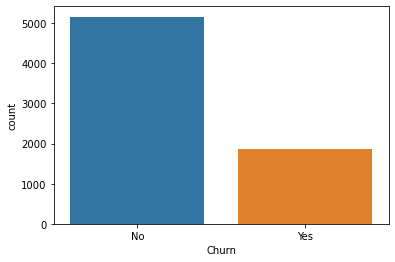

In [99]:
sns.countplot(x=df['Churn'])

**Exploring the distrbution of TotalCharges between Churn categories with a Box Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

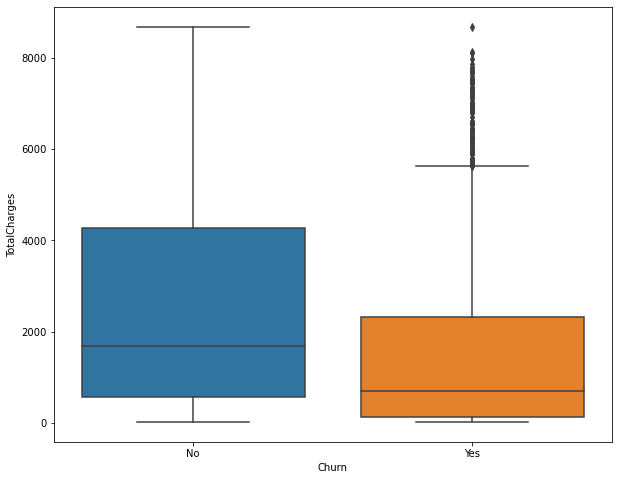

In [100]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Churn'], y=df['TotalCharges'])

**A boxplot showing the distribution of TotalCharges per Contract type, and hue coloring based on the Churn class.**

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

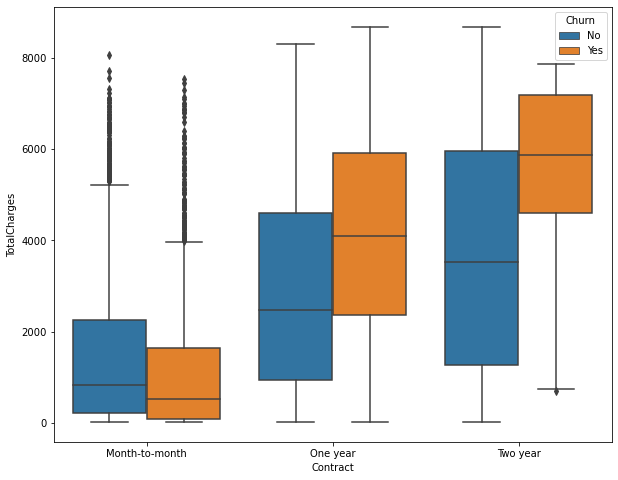

In [101]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Contract'], y=df['TotalCharges'], hue=df['Churn'])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**We will Create a bar plot showing the correlation of the following features to the class label. For the categorical features, we will need to convert them into dummy variables first, as we can only calculate correlation for numeric features.**

['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']




In [103]:
korr = df.drop('customerID', axis = 1)

In [104]:
korr.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [105]:
korr = pd.get_dummies(korr, drop_first=True)

In [106]:
korr.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [107]:
korr = korr.corr()['Churn_Yes'].sort_values(ascending=False)

In [108]:
# The first one is churn itself, so we drop it.

korr = korr.tail(korr.shape[0] -1)
korr

InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270
Contract_One year                       -0.178225


**We will take the best 15 correlation values. We will use the absolute, since both positive and negative correlation are interesting to us.**

In [109]:
best15 = pd.DataFrame(np.abs(korr).nlargest(16))

In [111]:

best15

,Churn_Yes
tenure,0.354049
InternetService_Fiber optic,0.307463
Contract_Two year,0.301552
PaymentMethod_Electronic check,0.301455
DeviceProtection_No internet service,0.227578
StreamingTV_No internet service,0.227578
StreamingMovies_No internet service,0.227578
OnlineBackup_No internet service,0.227578
OnlineSecurity_No internet service,0.227578
InternetService_No,0.227578


Text(0.5, 1.0, 'Absolute correlation with churn')

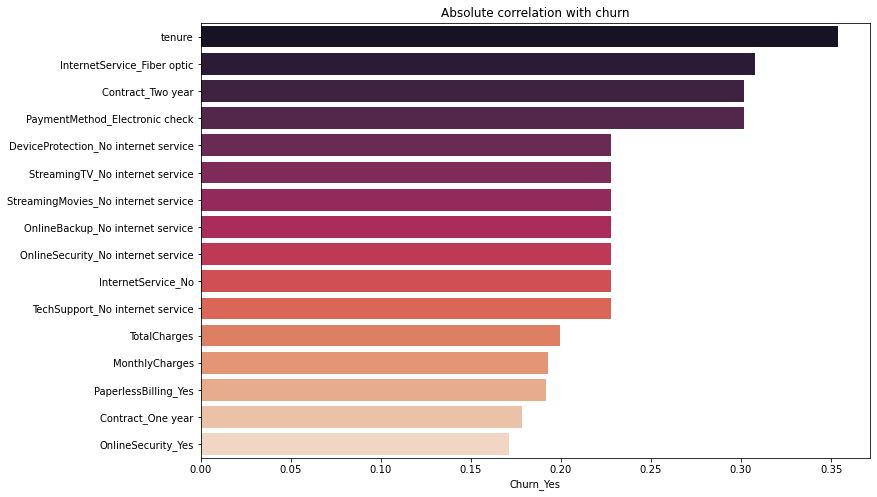

In [112]:
plt.figure(figsize=(12,8))
sns.barplot(data=best15, x="Churn_Yes", y=best15.index, palette="rocket").set_title("Absolute correlation with churn")

In [120]:
korr = korr.to_frame()

Text(0.5, 1.0, 'Correlation with churn')

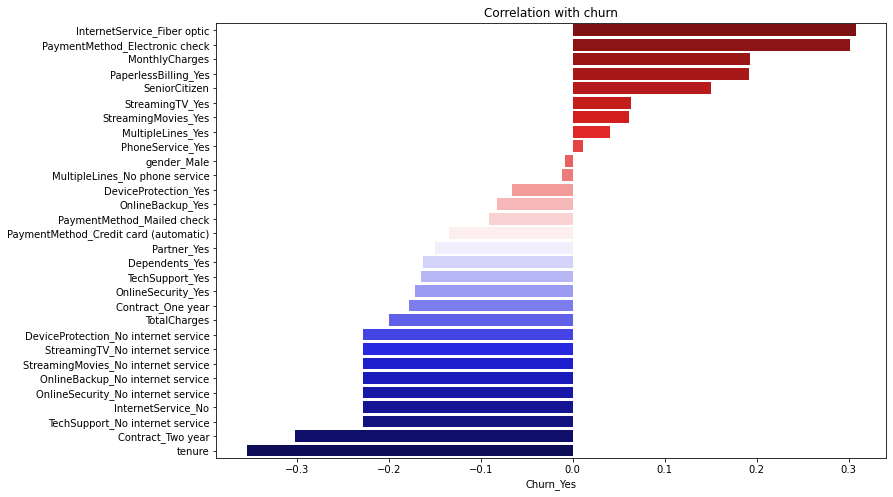

In [125]:
plt.figure(figsize=(12,8))
sns.barplot(data=korr, x="Churn_Yes", y=korr.index, palette="seismic_r").set_title("Correlation with churn")

---
---

# Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**What are the 3 contract types available?**

In [126]:
np.unique(df['Contract'])

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**We will create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

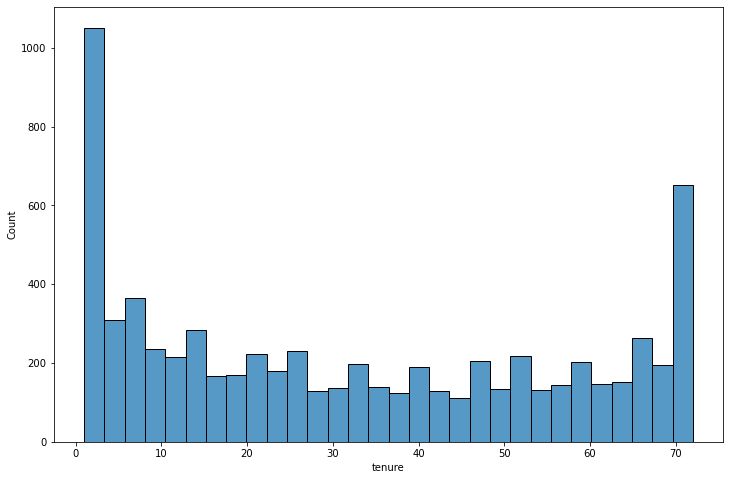

In [127]:
plt.figure(figsize=(12,8))
sns.histplot(df['tenure'], bins=30)

**Now we will create histograms separated by two additional features, Churn and Contract.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

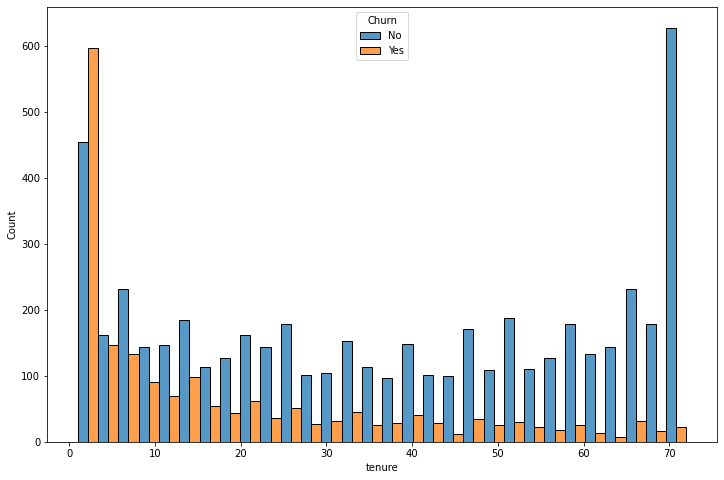

In [128]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x='tenure', hue='Churn', bins=30, multiple='dodge')

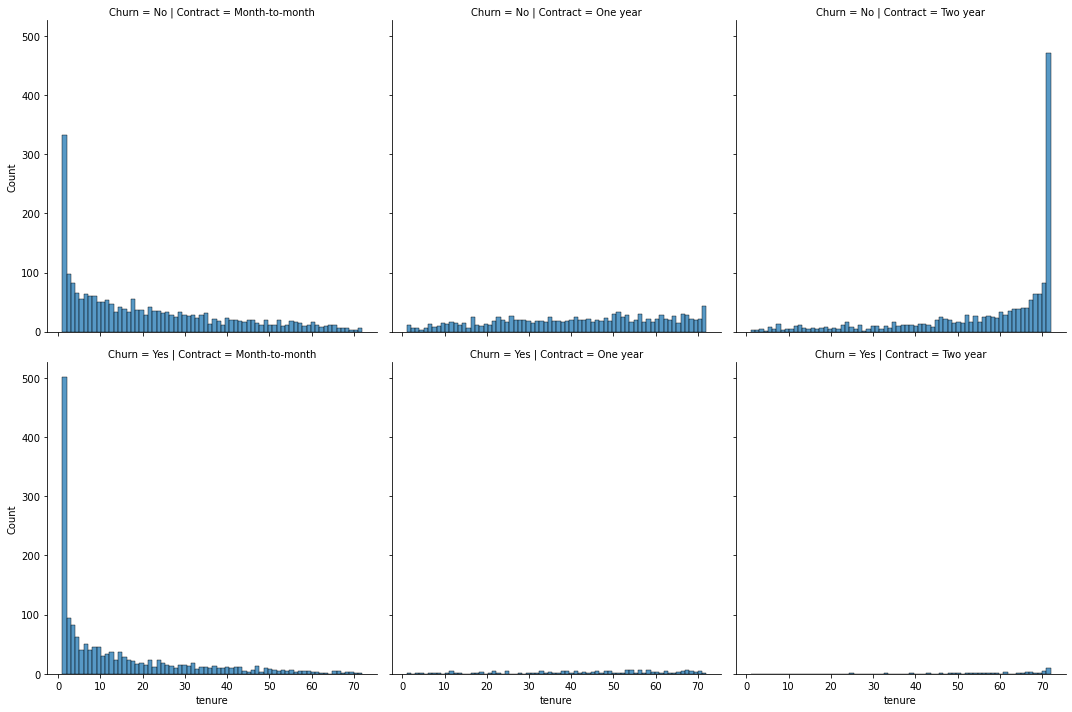

In [ ]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

**A scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

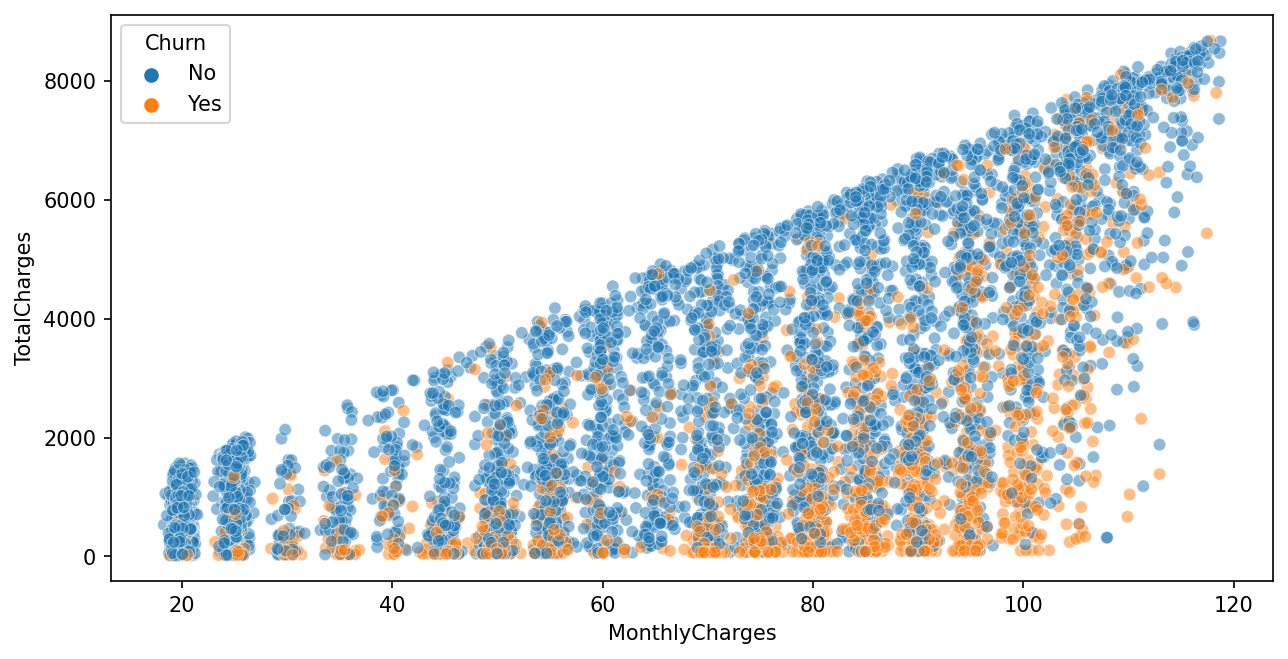

In [129]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data = df, y = "TotalCharges", x = "MonthlyCharges", hue="Churn", alpha=0.5)

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. We should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [130]:
df['tenure'].sort_values(ascending=False)

2983    72
3817    72
3879    72
6650    72
6652    72
        ..
3845     1
474      1
1366     1
1368     1
0        1
Name: tenure, Length: 7032, dtype: int64

In [131]:
df.groupby('tenure')['Churn'].value_counts(normalize=True)

tenure  Churn
1       Yes      0.619902
        No       0.380098
2       Yes      0.516807
        No       0.483193
3       No       0.530000
                   ...   
70      Yes      0.092437
71      No       0.964706
        Yes      0.035294
72      No       0.983425
        Yes      0.016575
Name: Churn, Length: 144, dtype: float64

In [132]:
cohort = df[['tenure', 'Churn']].set_index('tenure').sort_index()

In [133]:
cohort

,Churn
tenure,
1,No
1,Yes
1,Yes
1,Yes
1,Yes
...,...
72,No
72,No
72,No


In [134]:
cohort = pd.DataFrame(cohort.groupby('tenure')['Churn'].value_counts(normalize=True))

In [135]:
cohort = cohort.rename(columns={'Churn' : 'Churn_perc'})

In [136]:
cohort = cohort.reset_index()

In [137]:
cohort = cohort[cohort['Churn'] == 'Yes']

cohort = cohort.set_index('tenure')



In [138]:
cohort = cohort.drop('Churn', axis = 1)

In [139]:
cohort['Churn_perc'] = cohort['Churn_perc']*100

In [140]:
cohort

,Churn_perc
tenure,
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697


**Now that we have Churn Rate per tenure group 1-72 months, we will create a plot showing churn rate per months of tenure.**

<AxesSubplot:title={'center':'Churn percentage per tenure months'}, xlabel='tenure', ylabel='Churn_perc'>

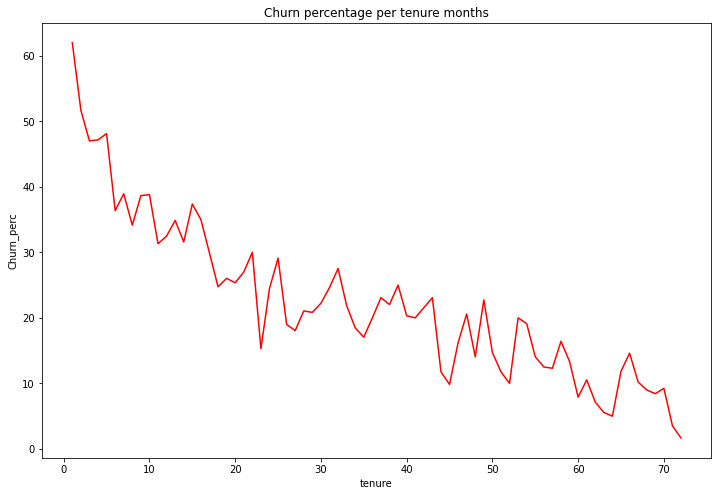

In [142]:
plt.figure(figsize=(12,8))
plt.title("Churn percentage per tenure months")
sns.lineplot(data = cohort, x = 'tenure', y = 'Churn_perc', color="red")

### Broader Cohort Groups
**Based on the tenure column values, we will create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [143]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

A function to output tenure cohorts:

In [144]:
def tencohort(x):
    if x < 13:
        return '0-12 Months'
    elif x < 25:
        return '12-24 Months'
    elif x < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [145]:
df['Tenure_Cohort'] = df['tenure'].apply(tencohort)

A quick check whether it's correct:

In [147]:
df[['tenure','Tenure_Cohort']].head(10)

,tenure,Tenure_Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**We will create a scatterplot of Total Charges versus Monthly Charts, colored by Tenure Cohort defined previously.**

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

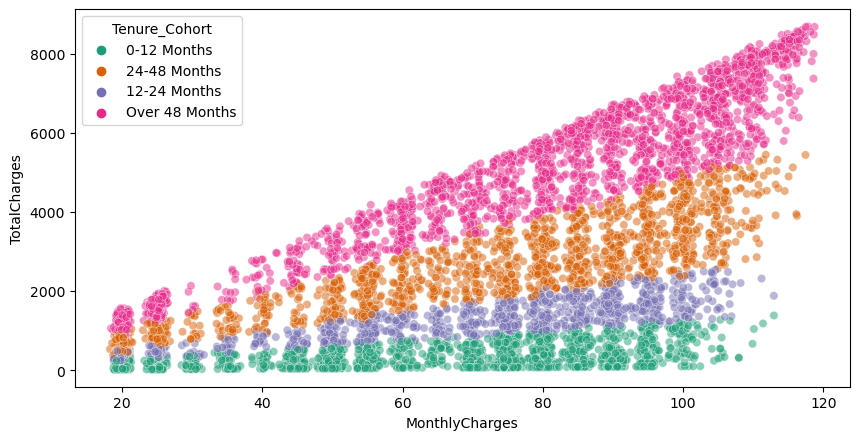

In [150]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data = df, y = "TotalCharges", x = "MonthlyCharges", hue="Tenure_Cohort", alpha=0.5, palette='Dark2')

**We will create a count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='Tenure_Cohort', ylabel='count'>

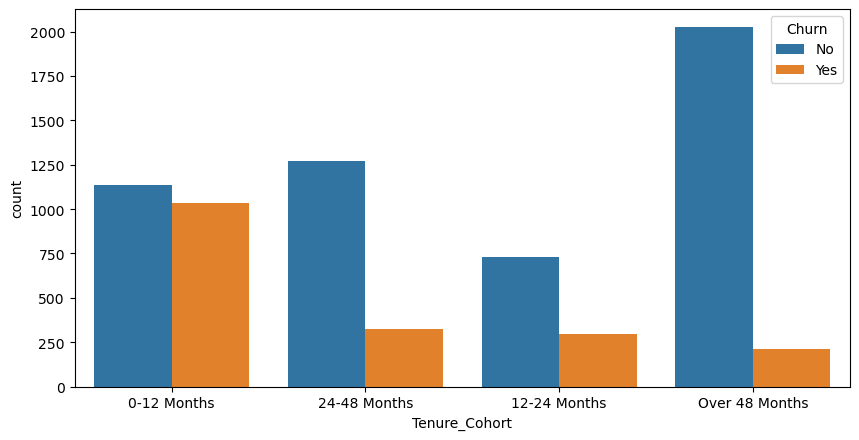

In [151]:
plt.figure(figsize=(10,5), dpi=100)

sns.countplot(data=df, x='Tenure_Cohort', hue='Churn')

As we can see, the longest cohort is clearly the least likely to churn.

**We will create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [160]:
#sns.catplot(data=df,x='Tenure_Cohort', hue='Churn', kind='count', col='Contract')

In [159]:
# an alternate version of the chart above
#g = sns.FacetGrid(df, col="Contract", hue="Churn", height=7)
#g.map(sns.countplot, "Tenure_Cohort", order=df.Tenure_Cohort.unique())
#g.add_legend()

Churn among tenure cohorts

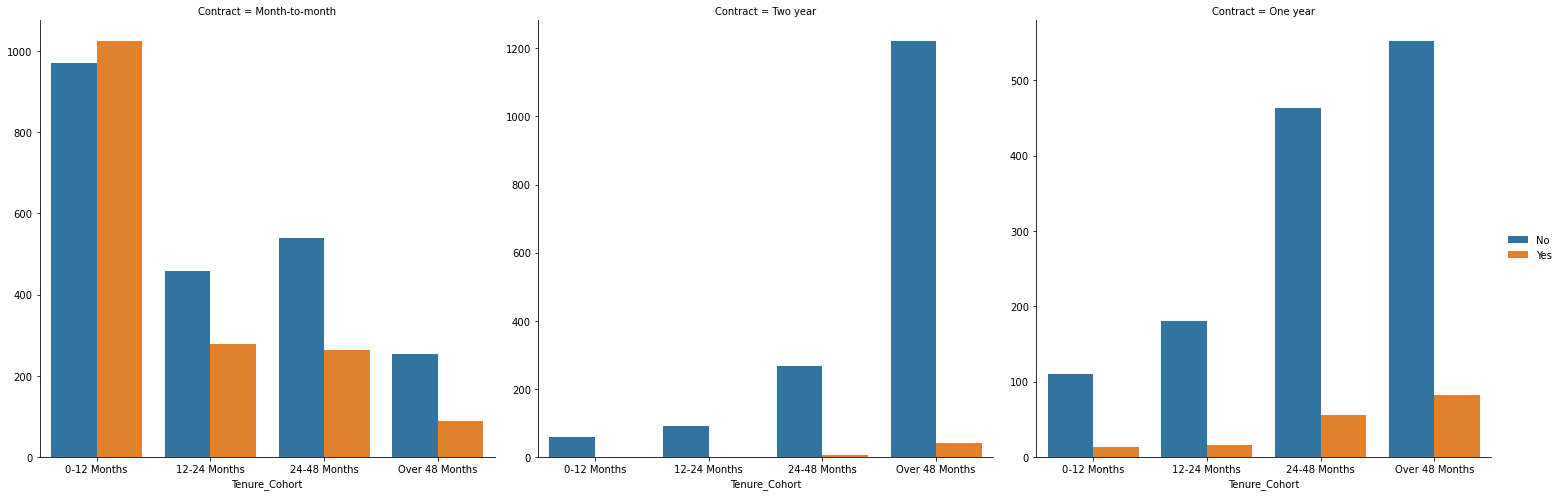

In [158]:
g = sns.FacetGrid(df.sort_values(by=['Tenure_Cohort']), col='Contract', height=7, sharex=False, sharey=False)
g.map_dataframe(sns.countplot, 'Tenure_Cohort', hue='Churn', palette=sns.color_palette()).add_legend()

-----

#  Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## Single Decision Tree

**We will separate out the data into X features and Y label. We'll create dummy variables where necessary and note which features are not useful and should be dropped.**

In [161]:
X = pd.get_dummies(df.drop('Churn',axis=1),drop_first=True)
y = df['Churn']

In [162]:
from sklearn.model_selection import train_test_split

**Performing a train test split, holding out 10% of the data for testing.**

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=99)

**Decision Tree Perfomance. We will do the following:**
   1. Train a single decision tree model 
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
model = DecisionTreeClassifier()

In [166]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [167]:
base_pred = model.predict(X_test)

In [197]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix, roc_auc_score

**False negatives are the most important to us.** (lower left corner)

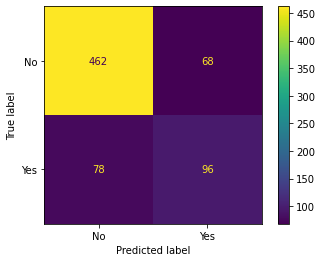

In [169]:
plot_confusion_matrix(model,X_test,y_test)

The decision tree has a 55% recall for churn-positives, which meansthe model correctly identifies 55% of the customers who will cancel.

In [170]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

          No       0.86      0.87      0.86       530
         Yes       0.59      0.55      0.57       174

    accuracy                           0.79       704
   macro avg       0.72      0.71      0.72       704
weighted avg       0.79      0.79      0.79       704



In [171]:
feat_imp = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

In [172]:
feat_imp['Feature Importance'].nlargest(15)

tenure                             0.167033
TotalCharges                       0.116476
InternetService_Fiber optic        0.105974
MonthlyCharges                     0.094463
PaymentMethod_Electronic check     0.014194
OnlineBackup_Yes                   0.012156
OnlineSecurity_Yes                 0.011117
SeniorCitizen                      0.010765
Contract_Two year                  0.010710
Dependents_Yes                     0.010410
MultipleLines_Yes                  0.010036
TechSupport_Yes                    0.009319
gender_Male                        0.009251
Contract_One year                  0.009057
TechSupport_No internet service    0.008333
Name: Feature Importance, dtype: float64

In [173]:
f = feat_imp['Feature Importance'].nlargest(20)

In [174]:
f

tenure                             0.167033
TotalCharges                       0.116476
InternetService_Fiber optic        0.105974
MonthlyCharges                     0.094463
PaymentMethod_Electronic check     0.014194
OnlineBackup_Yes                   0.012156
OnlineSecurity_Yes                 0.011117
SeniorCitizen                      0.010765
Contract_Two year                  0.010710
Dependents_Yes                     0.010410
MultipleLines_Yes                  0.010036
TechSupport_Yes                    0.009319
gender_Male                        0.009251
Contract_One year                  0.009057
TechSupport_No internet service    0.008333
PaperlessBilling_Yes               0.007949
PaymentMethod_Mailed check         0.007401
StreamingTV_Yes                    0.007091
Partner_Yes                        0.006584
DeviceProtection_Yes               0.005933
Name: Feature Importance, dtype: float64

<AxesSubplot:>

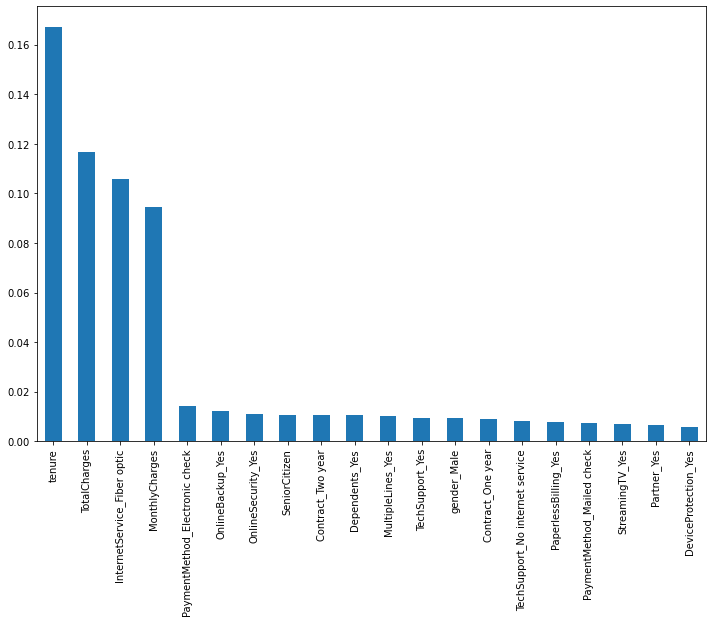

In [175]:
f.plot(kind='bar', figsize=(12,8))

## Random Forest

**Now we will create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rfmodel = RandomForestClassifier(n_estimators=20,max_features='auto',random_state=99)

In [179]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=99)

In [180]:
preds = rfmodel.predict(X_test)

In [181]:
confusion_matrix(y_test,preds)

array([[494,  36],
       [ 99,  75]])

We will look for false negatives.

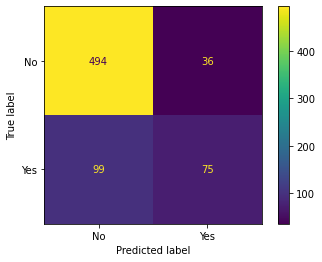

In [182]:
plot_confusion_matrix(rfmodel,X_test,y_test)

In [183]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.83      0.93      0.88       530
         Yes       0.68      0.43      0.53       174

    accuracy                           0.81       704
   macro avg       0.75      0.68      0.70       704
weighted avg       0.79      0.81      0.79       704



## Boosted Trees

**We will use AdaBoost to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [184]:
from sklearn.ensemble import AdaBoostClassifier

In [190]:
adamodel = AdaBoostClassifier(n_estimators=50)

In [186]:
adamodel.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [187]:
predictions = adamodel.predict(X_test)

In [188]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88       530
         Yes       0.64      0.54      0.59       174

    accuracy                           0.81       704
   macro avg       0.75      0.72      0.73       704
weighted avg       0.80      0.81      0.81       704



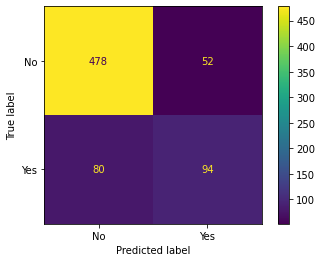

In [189]:
plot_confusion_matrix(adamodel,X_test,y_test)


## Gradient boosting

And now we will try gradient boosted trees:

In [191]:
from sklearn.ensemble import GradientBoostingClassifier

In [194]:
params = {
    "n_estimators": 120,
    "max_depth": 3,
    "subsample": 0.5,
    "learning_rate": 0.1,
    "min_samples_leaf": 1,
    "random_state": 3,
}
clf = GradientBoostingClassifier(**params)

In [195]:
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))


Accuracy: 0.8168


In [199]:
gb_preds = clf.predict(X_test)

Gradient boosting here has 54% recall for churn positives. It means that it identifies around 54% of actual churns.

In [200]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.86      0.91      0.88       530
         Yes       0.66      0.54      0.59       174

    accuracy                           0.82       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.81      0.82      0.81       704



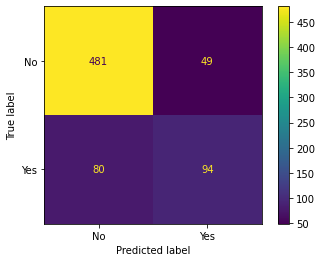

In [196]:
plot_confusion_matrix(clf,X_test,y_test)

## It seems that all tree based models performed roughly equally, a "simple" decision tree performed just as well as the boosted models.

Gridsearch cross validation could be used to find better parameters, or maybe using a different machine learning model like logistic regression or SVM could give us better results.